In [1]:
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt


In [2]:
url = 'https://raw.githubusercontent.com/ikele218-stack/Python-Project-2/refs/heads/main/Exercise%2034%20copy.csv'
df = pd.read_csv(url)
df.head()

,Gene Name,Control_1,Control_2,Control_3,KO_1,KO_2,KO_3
0,rpoC,32144000.0,27876000.0,16709000.0,25664000.0,27452000.0,21104000.0
1,gdhZ,30783000.0,27132000.0,16343000.0,19289000.0,21274000.0,17230000.0
2,rpoB,32908000.0,29162000.0,16587000.0,26168000.0,27069000.0,20876000.0
3,putA,41257000.0,36150000.0,24990000.0,24859000.0,27692000.0,23306000.0
4,gltB,4974600.0,4334200.0,3135400.0,2797400.0,2852700.0,2198300.0


In [3]:
print(df.keys())


Index(['Gene Name', 'Control_1', 'Control_2', 'Control_3', 'KO_1', 'KO_2',
       'KO_3'],
      dtype='object')


In [4]:
print(df.shape)


(2779, 7)


In [5]:
df

,Gene Name,Control_1,Control_2,Control_3,KO_1,KO_2,KO_3
0,rpoC,32144000.0,27876000.0,16709000.0,25664000.0,27452000.0,21104000.00
1,gdhZ,30783000.0,27132000.0,16343000.0,19289000.0,21274000.0,17230000.00
2,rpoB,32908000.0,29162000.0,16587000.0,26168000.0,27069000.0,20876000.00
3,putA,41257000.0,36150000.0,24990000.0,24859000.0,27692000.0,23306000.00
4,gltB,4974600.0,4334200.0,3135400.0,2797400.0,2852700.0,2198300.00
...,...,...,...,...,...,...,...
2774,CCNA_03985,5307.1,5483.3,7433.1,8070.4,8948.8,9434.10
2775,CCNA_03998,20734.0,15255.0,10074.0,11813.0,13762.0,9242.80
2776,bpt,60581.0,43327.0,47557.0,46625.0,45906.0,33519.00
2777,nuoK,3692.7,5039.7,7084.0,5946.8,6372.7,12292.00


In [6]:
df.dropna(inplace = True)
print(df.shape)

(2779, 7)


In [7]:
df = df.set_index('Gene Name')

Additionally dropped 6 rows with zero standard deviation.


/usr/local/lib/python3.12/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/usr/local/lib/python3.12/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


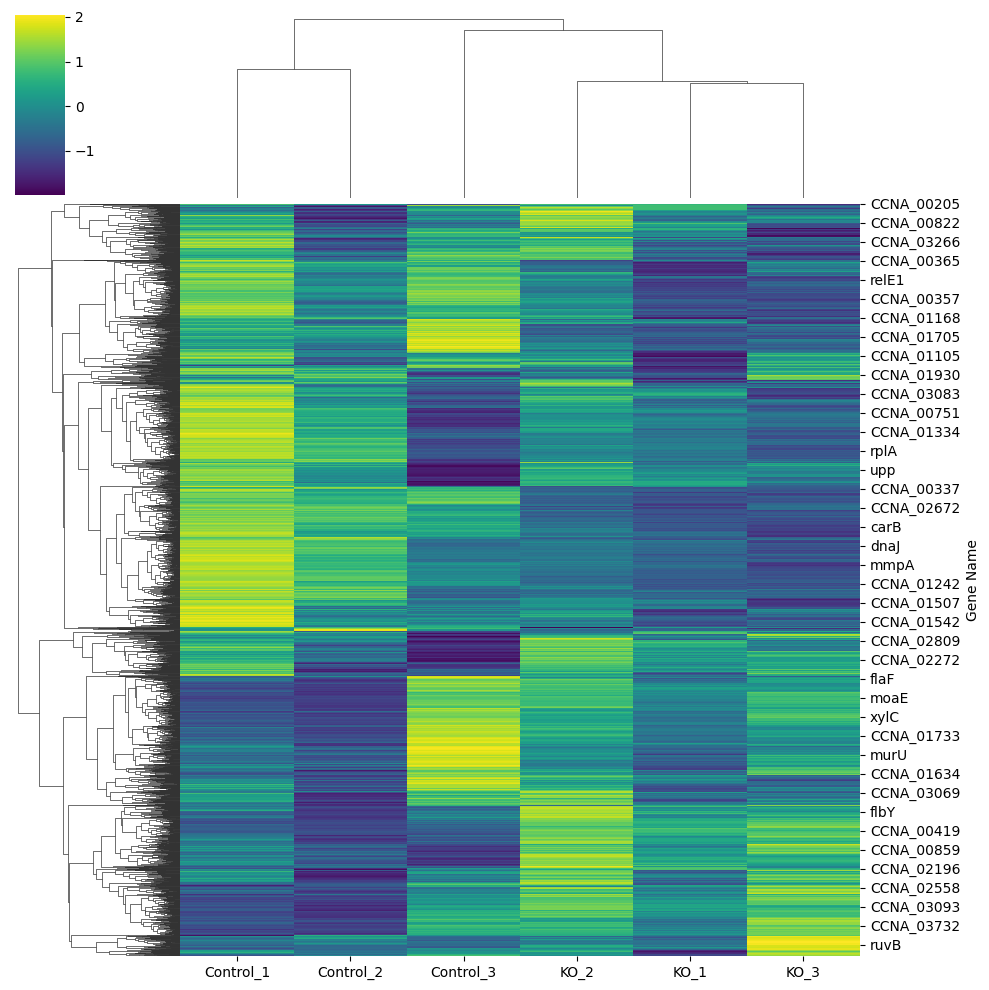

In [9]:
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

# Data loading and preprocessing from previous cells
url = 'https://raw.githubusercontent.com/ikele218-stack/Python-Project-2/refs/heads/main/Exercise%2034%20copy.csv'
df = pd.read_csv(url)
df.dropna(inplace = True)
df = df.set_index('Gene Name')

# Create a copy of the DataFrame to work with
df_for_clustering = df.copy()

# Ensure all columns are numeric (float64) and handle non-numeric/non-finite values
# Iterate over columns to ensure each is converted to float and handle potential issues
for col in df_for_clustering.columns:
    # Convert to numeric, coercing errors to NaN
    df_for_clustering[col] = pd.to_numeric(df_for_clustering[col], errors='coerce')
    # Replace inf/-inf with NaN
    df_for_clustering[col] = df_for_clustering[col].replace([np.inf, -np.inf], np.nan)
    # Ensure it's float64 type explicitly
    df_for_clustering[col] = df_for_clustering[col].astype(np.float64)


# Drop any rows that contain NaN values (introduced by coerce or replace)
df_cleaned = df_for_clustering.dropna()

# Check if any rows were dropped
if df_cleaned.shape[0] < df.shape[0]:
    print(f"Dropped {df.shape[0] - df_cleaned.shape[0]} rows containing non-finite values.")

# Final check for non-finite values as a safeguard before plotting
if not np.isfinite(df_cleaned.values).all():
    print("CRITICAL WARNING: df_cleaned STILL contains non-finite values even after extensive cleaning. This suggests a deeper data issue.")
    # As a last resort, forcefully drop rows where np.isfinite finds non-finite values
    df_cleaned = df_cleaned[np.isfinite(df_cleaned.values).all(axis=1)]

# Remove rows with zero standard deviation to prevent errors during z-scoring
row_stds = df_cleaned.std(axis=1)
df_cleaned = df_cleaned[row_stds > 0]

# Optional: print how many rows were removed due to zero standard deviation
if df_for_clustering.shape[0] > df_cleaned.shape[0]:
    print(f"Additionally dropped {df_for_clustering.shape[0] - df_cleaned.shape[0]} rows with zero standard deviation.")

sns.clustermap(df_cleaned, metric="euclidean", z_score=0, method="average",cmap="viridis")
png_path = 'HeatMAp.png'
pdf_path = 'HeatMAp.pdf'
plt.savefig(png_path, dpi=600)
plt.savefig(pdf_path)
plt.show()

/usr/local/lib/python3.12/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/usr/local/lib/python3.12/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


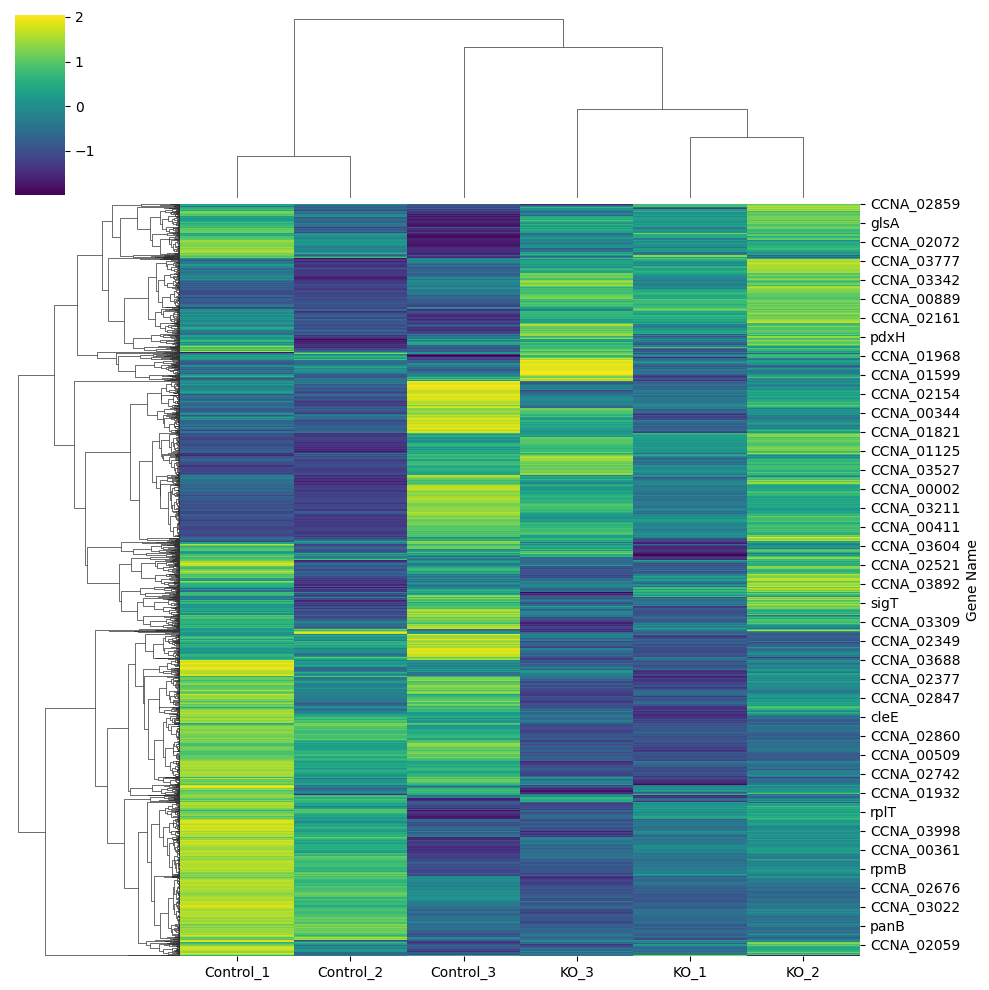

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt

sns.clustermap(df_cleaned, metric="Correlation", z_score=0, method="average", cmap="viridis")
plt.show()